In [1]:
import polars as pl
import networkx as nx
import community
import matplotlib.pyplot as plt
import leidenalg
import igraph as ig

import folium
import pandas as pd
import ipywidgets as widgets

In [2]:
df = pl.read_csv('../rtf/joined_data.csv')

In [3]:
G = nx.DiGraph()

for row in df.rows(named=True):
    G.add_edge(row['Seller'], row['Buyer'], weight=1)

In [4]:
# Convert the graph to igraph
ig_graph = ig.Graph.TupleList(G.edges(), directed=True)

# Print the number of vertices and edges in the igraph
print("Number of vertices:", ig_graph.vcount())
print("Number of edges:", ig_graph.ecount())


Number of vertices: 264
Number of edges: 2973


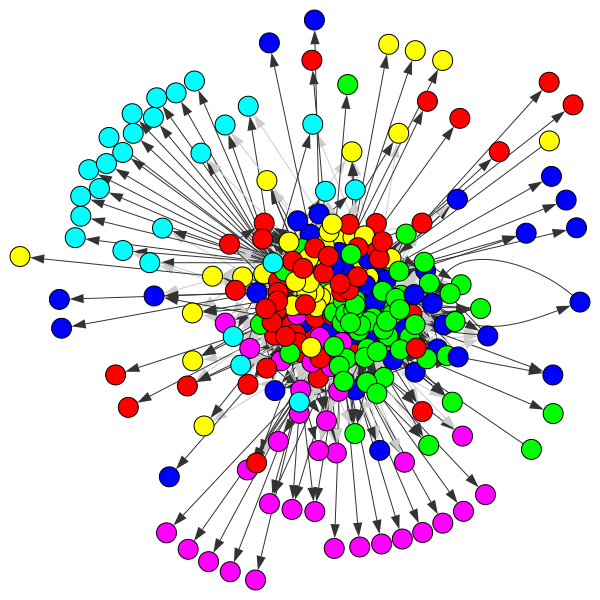

In [5]:
# Run the Leiden algorithm for community detection
partition = leidenalg.find_partition(ig_graph, leidenalg.VertexPartition.RBConfigurationVertexPartition, n_iterations=-1)

ig.plot(partition)

In [6]:

# create a dictionary to store the community members
community_members = {}
for vertex_name, community_id in zip(G.nodes(), partition.membership):
    if community_id in community_members:
        community_members[community_id].append(vertex_name)
    else:
        community_members[community_id] = [vertex_name]

# print the community members
for community_id, members in community_members.items():
    print(f"Community {community_id}: {members}")

Community 2: ['Soviet Union', 'East Germany (GDR)', 'United Kingdom', 'Canada', 'Lebanon', 'India', 'Netherlands', 'Indonesia', 'North Korea', 'United States', 'Uruguay', 'Belgium', 'Denmark', 'Israel', 'France', 'Italy', 'New Zealand', 'Colombia', 'Peru', 'Sri Lanka', 'Egypt', 'Argentina', 'Haiti', 'Dominican Republic', 'Iran', 'Albania', 'Chile', 'Paraguay', 'Romania', 'Bolivia', 'Philippines', 'Yugoslavia', 'Luxembourg', 'Finland', 'South Vietnam', 'Ecuador', 'PAIGC (Portugal)*', 'Western Sahara', 'Lebanon Palestinian rebels*', 'Belarus', 'North Macedonia', 'unknown rebel group*', 'Uzbekistan', 'United Wa State (Myanmar)*', 'LRA (Uganda)*', 'Timor-Leste', 'Hamas (Palestine)*', 'Syria rebels*']
Community 0: ['Jordan', 'Norway', 'Greece', 'South Africa', 'South Korea', 'Syria', 'Venezuela', 'Australia', 'Myanmar', 'Zimbabwe', 'North Yemen', 'Brazil', 'Mongolia', 'Germany', 'Nicaragua', 'Armas (Guatemala)*', "Cote d'Ivoire", 'Cameroon', 'Algeria', 'Benin', 'Mali', 'Jamaica', 'Cyprus', 

In [7]:
# set the initial center node
center_node = 'United States'

# find the neighbors of the center node
neighbors = ig_graph.neighbors(center_node, mode='out')

# create a subgraph with the center node and its neighbors
subgraph = ig_graph.subgraph([center_node] + neighbors)

# run the Leiden algorithm on the subgraph
partition = leidenalg.find_partition(subgraph, leidenalg.VertexPartition.RBConfigurationVertexPartition)

# print the communities
print(partition)

Clustering with 183 elements and 4 clusters
[0] Austria, Finland, Botswana, Nicaragua, United Kingdom, Norway, Denmark,
    Israel, Canada, Belgium, Ireland, Venezuela, Greece, Sweden, Switzerland,
    Italy, Netherlands, France, Portugal, Brazil, Japan, Chile, Ecuador,
    Uruguay, Germany, Argentina, Spain, Mexico, Jamaica, Tunisia, Panama,
    Philippines, Paraguay, Bahamas, Lesotho, Honduras, Taiwan, Suriname,
    Haiti, South Korea, Colombia, Estonia, Latvia, Bolivia, Guatemala,
    Dominican Republic, Gabon, Slovenia, El Salvador, Luxembourg, South
    Vietnam, Biafra
[1] North Korea, China, Hungary, Bulgaria, Poland, Viet Nam, Afghanistan,
    Guinea, Cuba, Algeria, Laos, Myanmar, Cambodia, Cyprus, Ethiopia,
    Tanzania, Uganda, Congo, Peru, Angola, Zambia, Zimbabwe, Guyana,
    Equatorial Guinea, Central African Republic, Yemen, NATO**, DR Congo,
    United Nations**, unknown recipient(s), Nepal, Rwanda, Sierra Leone,
    Czechia, Lithuania, Ukraine, Senegal, Croatia, Kazakhst

In [8]:
center_nodes = ['Soviet Union', 'United States', 'France']
partition = leidenalg.find_partition(ig_graph, leidenalg.VertexPartition.RBConfigurationVertexPartition)
print(partition)

Clustering with 264 elements and 6 clusters
[0] China, Afghanistan, India, Guinea, Ghana, Laos, Uganda, Sri Lanka, Zambia,
    Zimbabwe, Mozambique, Equatorial Guinea, Burundi, Central African
    Republic, Yemen, South Africa, DR Congo, United Nations**, Cameroon,
    unknown recipient(s), Kenya, Nepal, Rwanda, Gambia, Sierra Leone, Eritrea,
    Czechia, Cote d'Ivoire, Ukraine, Djibouti, Armenia, Senegal, Croatia,
    Kazakhstan, Uzbekistan, Turkmenistan, Maldives, Namibia, Bosnia-
    Herzegovina, North Macedonia, Georgia, Azerbaijan, Serbia, South Sudan,
    Slovakia, Montenegro, Russia, Viet Minh (France)*, FNLA (Angola)*, Timor-
    Leste, Belarus, Tajikistan, Kyrgyzstan, RUF (Sierra Leone)*, Northern
    Alliance (Afghanistan)*, Ukraine Rebels*, Northern Cyprus, SNA (Somalia)*,
    UIC (Somalia)*
[1] Austria, Finland, Cabo Verde, Botswana, United Kingdom, Norway, Denmark,
    Israel, Canada, Belgium, Ireland, Venezuela, Greece, Sweden, Switzerland,
    Italy, Netherlands, France,

In [9]:


# Create a map centered on the world
mapA = folium.Map(location=[0, 0], zoom_start=2)

# Define a function to update the map for a given year
def update_map(year):

    # Add a choropleth layer to the map using the data
    choropleth = folium.Choropleth(
        geo_data='world.json',
        columns=['country', 'value'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Value',
        highlight=True,
    ).add_to(mapA)

    # Add a tooltip to show the country name and value
    folium.GeoJsonTooltip(fields=['name', 'value']).add_to(choropleth.geojson)

    # Remove the previous choropleth layer (if any)
    if len(mapA._children) > 1:
        mapA._children.pop(0)

    # Display the updated map
    display(mapA)

# Create a slider to select the year
year_slider = widgets.IntSlider(
    value=1950,
    min=1950,
    max=2022,
    step=1,
    description='Year:',
    continuous_update=False,
)

# Register the update_map function to be called when the slider value changes
widgets.interactive(update_map, year=year_slider)

# Display the initial map
update_map(year_slider.value)

FileNotFoundError: [Errno 2] No such file or directory: 'world.json'